#                                   PROJET D'ANALYSE DE DONNEES 2

![towardsdatascience](https://cdn-images-1.medium.com/max/800/1*PM4dqcAe6N7kWRpXKwgWag.png)

# **Exercice 1**

# **Question 1**

In [4]:
import pandas as pd #tableau
import numpy as np # calcul matrices
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA

In [5]:
train = pd.read_csv('Faces_Train_Inputs.csv', header=None)

In [48]:
labels_train = pd.read_csv('Faces_Train_Labels.csv', header=None).iloc[0].values

In [7]:
test = pd.read_csv('Faces_Test_Inputs.csv', header=None)

In [49]:
labels_test = pd.read_csv('Faces_Test_Labels.csv', header=None).iloc[0].values

**Description des datasets**

Notre jeux de données est separé en 4 datasets :
    * un jeu de donnée d'apprentissage qui correspond à la dataset "train" et ses labels (labels_train)   
    * un jeu de donnée de test qui permettra de verifier si les données ont bien été labelisées

In [95]:
np.unique(labels_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40], dtype=int64)

In [96]:
np.unique(labels_test)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40], dtype=int64)

In [6]:
train.describe() 

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
count,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,...,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,0.335306,0.335686,0.336360,0.335760,0.336470,0.335882,0.335858,0.335662,0.336127,0.336985,...,0.249448,0.254362,0.257868,0.261189,0.267684,0.278149,0.280747,0.277941,0.284546,0.288481
std,0.140017,0.139345,0.137750,0.138020,0.137608,0.137859,0.136993,0.136995,0.135962,0.133662,...,0.131729,0.138905,0.144200,0.148575,0.154127,0.160391,0.163233,0.159327,0.162919,0.169104
min,0.074510,0.086275,0.086275,0.090196,0.090196,0.094118,0.082353,0.082353,0.078431,0.090196,...,0.062745,0.058824,0.043137,0.050980,0.047059,0.062745,0.062745,0.062745,0.062745,0.054902
25%,0.188240,0.195100,0.196080,0.195100,0.192160,0.192160,0.196080,0.196080,0.199020,0.200000,...,0.151960,0.152940,0.152940,0.152940,0.156860,0.160780,0.163727,0.160780,0.163727,0.159800
50%,0.386275,0.384310,0.388240,0.390200,0.392160,0.390200,0.390200,0.390200,0.386275,0.386275,...,0.221570,0.219610,0.221570,0.223530,0.219610,0.235290,0.245100,0.243140,0.243140,0.245100
75%,0.450980,0.447060,0.451960,0.450980,0.450980,0.448040,0.447060,0.447060,0.448040,0.447060,...,0.317650,0.325490,0.329410,0.329410,0.325490,0.333330,0.337250,0.342160,0.352940,0.356860
max,0.615690,0.611760,0.607840,0.611760,0.607840,0.607840,0.603920,0.611760,0.611760,0.607840,...,0.741180,0.752940,0.733330,0.839220,0.823530,0.874510,0.847060,0.784310,0.792160,0.850980


In [9]:
faces = train.values

In [10]:
faces.shape, type(faces)

((320, 10304), numpy.ndarray)

In [11]:
#pour pouvoir representer le format appropriée 10304=112*92,Order=False(pour la representation en colonne)
faces=faces.reshape((-1, 112, 92), order='F')

In [12]:
faces.shape

(320, 112, 92)

chaque ligne de la dataset train repreente un visage.Dans la suite nous allons representer les 2 premiers visages de cette 
dataset.

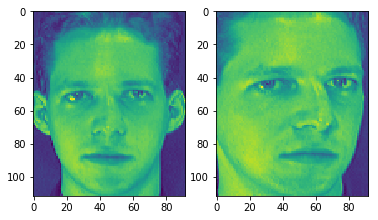

In [13]:
fig, axes=plt.subplots(1, 4,figsize = (6,4)) #sur une ligne on affiche deux images

plt.subplot(1,2,1)
plt.imshow(faces[0])
plt.subplot(1,2,2)
plt.imshow(faces[1])
plt.show()

le dernier visage est le suivant

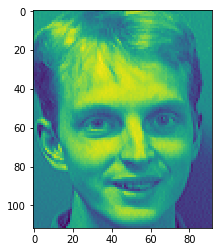

In [14]:
plt.imshow(faces[319])
plt.show()

**Representation graphique du visage moyen (moyenne de toutes les lignes) de l'echantillon train.**

In [15]:
avg_face = faces.mean(axis=0)
avg_face.shape

(112, 92)

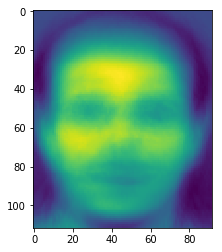

In [16]:
#representation du visage moyen
plt.imshow(avg_face)
plt.show()

**Nous pouvons aussi representer les visages moyens correspondant aux differents labels de train**
   * representation du visage moyen correspondant au label 3 de la dataset train 

In [17]:
avg_face=faces[np.where(labels_train==3)[0],].mean(axis=0)
avg_face.shape

(112, 92)

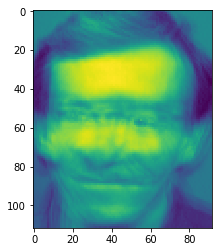

In [18]:
#projection du visage moyen 
plt.imshow(avg_face)
plt.show()

# Question 2

**Appliquez une ACP pour reduire la dimension du dataset pour k=5, 10 et 50.**

In [20]:
data_known=train.values
data_unknown=test.values

In [21]:
def acp(data,n_components):
    pca = PCA(n_components=n_components)
    pca.fit(data)
    data_known_pca=pca.transform(data)
    data_known_pca.shape
    return data_known_pca,pca


# pour k=5

In [22]:
#Application de l'ACP
data_known_pca_5,pca_5=acp(data=data_known,n_components=5)

In [23]:
data_known_pca_5.shape

(320, 5)

# Pour k=10

In [24]:
#Application de l'ACP
data_known_pca_10,pca_10=acp(data=data_known,n_components=10)

# Pour k=50

In [25]:
#Application de l'ACP
data_known_pca_50,pca_50=acp(data=data_known,n_components=50)

# Question 3

**Choisissez un visage et representez le graphiquement pour k=5,10,50**

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Text(0.5, 0, 'ACP_5')

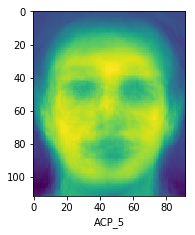

In [27]:
plt.subplot(1,2,1)
inverse5 = pca_5.inverse_transform(data_known_pca_5)
plt.imshow(inverse5[0:1].reshape(92,112).T)
plt.xlabel("ACP_5")

Text(0.5, 0, 'ACP_10')

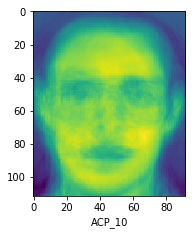

In [28]:
plt.subplot(1,2,1)
inverse10 = pca_10.inverse_transform(data_known_pca_10)
plt.imshow(inverse10[0:1].reshape(92,112).T)
plt.xlabel("ACP_10")

Text(0.5, 0, 'ACP_50')

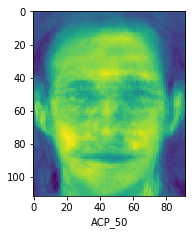

In [29]:
plt.subplot(1,2,1)
inverse50 = pca_50.inverse_transform(data_known_pca_50)
plt.imshow(inverse50[0:1].reshape(92,112).T)
plt.xlabel("ACP_50")

# Question 4

**L'ACP est plutôt longue lorsque la quantite de colonnes est tres tres grande, proposez
une solution.**

* Choisir les variables actives (en faisant un tableau de correlations sur les  variables)
* Choisir de réduire ou non les variables
* Réaliser l’ACP

# Question 5

**En utilisant le dataset reduit par ACP, implémentez un K plus proche voisin, pour
pouvoir classifier les images du test.**

In [30]:
## Compute distances
class KNN():
    
    def __init__(self, n_neighbors = 5):
        self.n_neighbors = n_neighbors
        
    def build_dist(self, data_unknown, data_known):
        dists = np.linalg.norm(data_unknown, axis=1)[:,np.newaxis]**2 - 2 * data_unknown.dot(data_known.T) \
        + np.linalg.norm(data_known, axis=1)**2 
        return dists
    
    def fit(self, data_known, y, n_neighbors):
        self.n_neighbors = n_neighbors
        self.data = data_known
        self.y = y
        dists = self.build_dist(data_known, data_known)
        neighrest_neighbors = dists.argsort(axis=1)[:,:self.n_neighbors]
        
    def predict(self, data_unknown,n_neighbors):
        self.n_neighbors = n_neighbors
        dists = self.build_dist(data_unknown, self.data)
        neighrest_neighbors = dists.argsort(axis=1)[:,:self.n_neighbors]
        
        n_u = len(data_unknown)
        predictions = np.zeros(n_u)

        for i in range(n_u):

            neighbors = neighrest_neighbors[i]
            labels_ = labels_train[neighbors]
            predictions[i] = Counter(labels_).most_common(1)[0][0]
            
        return predictions
    
    def score(self, data_unknown, y_unknown,n_neighbors):
        self.n_neighbors = n_neighbors
        predictions = self.predict(data_unknown,n_neighbors)
        return 100*(y_unknown==predictions).mean()

In [31]:
knn = KNN(n_neighbors=5)
knn.fit(data_known_pca_5, labels_train,n_neighbors=5)

In [32]:
knn.score(data_known_pca_5, labels_train,n_neighbors=5)

90.625

# Question 6

In [146]:
collection=[5,10,30,50,150,300]
n_neighbors=5
for i in collection:
    K=i
    data_known_pca,pca=acp(data=data_known,n_components=K)
    knn = KNN(n_neighbors)
    knn.fit(data_known_pca, labels_train,n_neighbors)
    print("Pour",K,"\n","score train :", knn.score(data_known_pca, labels_train,n_neighbors))
    data_unknown_pca=pca.transform(data_unknown)
    print("score test :",knn.score(data_unknown_pca, labels_test,n_neighbors),"\n")


Pour 5 
 score train : 90.625
score test : 76.25 

Pour 10 
 score train : 93.125
score test : 85.0 

Pour 30 
 score train : 97.1875
score test : 91.25 

Pour 50 
 score train : 97.5
score test : 93.75 

Pour 150 
 score train : 97.1875
score test : 93.75 

Pour 300 
 score train : 96.25
score test : 93.75 



on observe avec **un n_neighbors=5 ou un n_neighbors= 3** on a un meilleur score de test pour K=50

# Queqtion 7

**Offrez des recommandations pour ameliorer le modele et appliquez les.**
   * **faire une Optimisation du score sur les données test :** ou **une validation croisée**
      Pour trouver le k optimal, on va simplement tester le modèle pour tous les k de 1 à 50, mesurer l’erreur test et afficher               la performance en fonction de k
   * **pénalisation**
     * Les régressions pénalisés sont des techniques puissantes généralement utilisées pour créer des modèles parcimonieux en               présence d'un "grand" nombre de variables

**une Optimisation du score sur les données test**

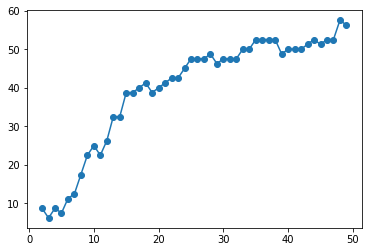

In [128]:
errors = []
for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(train,labels_train).score(test, labels_test)))
plt.plot(range(2,50), errors, 'o-')
plt.show()

Comme on peut le voir, le **k-NN le plus performant** est celui pour lequel **k = 3**. On connait donc notre classifieur final optimal : 3-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données.

In [137]:
test1=test.values

In [138]:
test1=test1.reshape((-1, 112, 92), order='F')

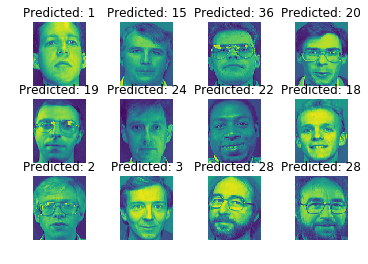

In [142]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(train,labels_train)

# On récupère les prédictions sur les données test
predicted = knn.predict(test)

# On redimensionne les données sous forme d'images
test1=test1.reshape((-1, 112, 92), order='F')

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(test1.shape[0], size=12)

# On affiche les visages avec la prédiction associée
for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(test1[value])
    plt.title('Predicted: %i' % predicted[value])

plt.show()

un petit exemple avec les données train pour verifier que nos données ont été bien classifiées.
* prenons par exemple predicted:2 qui correspond au label 2 (des données de train=faces) (vérifions qui correspond au visage ci-dessus)


In [203]:
d=faces[np.where(labels_train==2)[0],]
d.shape

(8, 112, 92)

In [204]:
a = np.arange(8)
a

array([0, 1, 2, 3, 4, 5, 6, 7])

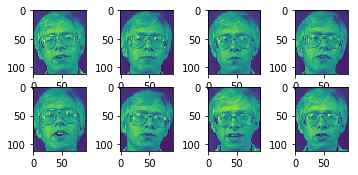

In [205]:
#representation des differentes expressions de visage du label numero 2
for k, value in enumerate(a):
    plt.subplot(3,4,k+1)
    plt.imshow(d[value])
    
plt.show()

**pénalisation**

In [77]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [80]:
def erreur_absolue_moyenne(y_pred,y_true): 
    return (np.mean(np.abs(y_pred-y_true)))

In [91]:
alpha_ridge = 0.1
alpha_lasso = 0.1

In [92]:
ridge=Ridge(alpha=alpha_ridge)
ridge.fit(train,labels_train)
y_pred_ridge = ridge.predict(test)
lasso=Lasso(alpha=alpha_lasso)
lasso.fit(train,labels_train)
y_pred_lasso = lasso.predict(test)
lr=LinearRegression()
lr.fit(train,labels_train)
y_pred_lr = lr.predict(test)

In [93]:
print("ridge "+str(erreur_absolue_moyenne(y_pred_ridge,labels_test)))
print("lasso "+str(erreur_absolue_moyenne(y_pred_lasso,labels_test)))
print("linear reg "+str(erreur_absolue_moyenne(y_pred_lr,labels_test)))

ridge 6.107124545023015
lasso 7.183918803061246
linear reg 6.113003279441151


on choisira la pénalisation Ridge car l'erreur est plus petite